# COS3a Übung 5
---
## Lösung
Abgabe bis 15.11.2022 12:00 Uhr

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Übung

### Aufgabe 11 (2 Punkte)

#### a)

In dieser Aufgabe sollen Sie über den Monte Carlo Algorithmus die Gleichgewichtsenergie einer 1D-Lösung bestehend aus zwei Spezien **A** und **B** berechnen. Die Lösung soll hierbei folgenden Eigenschaften aufzeigen:

1. Die Lösung soll eine eindimensionale Kette an Teilchen sein.
2. Jede Position die sich hieraus ergibt soll durch **A** oder **B** besetzt sein.
3. Die beiden Spezien wechselwirken lediglich mit ihren direkten Nachbarn. Das heißt, dass jedes Teilchen mit zwei anderen Teilchen wechselwirkt. 
4. Es sollen periodische Randbedingungen gelten. Das Teilchen, das ganz rechts sitzt, soll also mit dem Teilchen auf der ganz linken Seite wechselwirken.

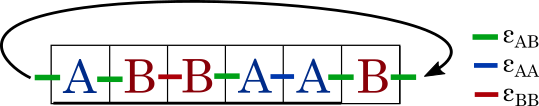

Die folgenden Parameter sind für Ihre Simulation wichtig:

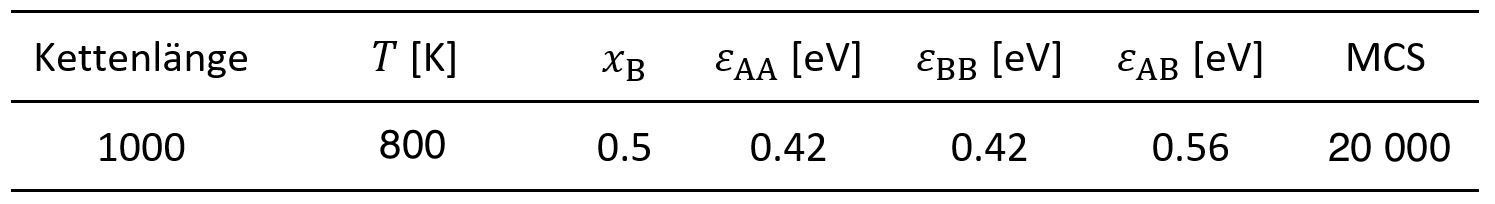

hierbei ist $T$ die Temperatur, $x_\mathrm{B}$ der Stoffmengenanteil von **B** im System, $\varepsilon_{ij}$ die Wechselwirkungsparameter für **A-A**, **A-B** und **B-B** und MCS die Anzahl an abzuschließenden Systemveränderungen bevor die Simulation abbricht. $x_\mathrm{B}$ darf in hier als grob betrachtet werden.

**Aufgabe:** Simulieren Sie dieses System und stellen Sie den Energieverlauf mit zunehmender MCS grafisch dar. Speichern Sie hierfür die Energie nach jedem MCS.

**Hinweis**: Die Berechnung der Gitterenergie wurde bereits für Sie in der Funktion `calc_lattice_energy` definiert. Als Parameter nimmt die Funktion ihr Gitter als 1D Liste an und gibt die Energie zurück. 

**Programmieranleitung:**

1. Definieren Sie die noch die gesetzten Variablen.


2. Definieren Sie das 1D Ausgangsgitter. (Die Teilchenkette lässt sich als Liste darstellen. Da es genügt den Stoffmengenanteil grob zu erreichen, kann über die `random.choice` Funktion eine Liste mit etwa der gleichen Anzahl an **A** und **B** erzeugt werden.)


3. Definieren Sie eine 'mcs'-Variable, die die abgeschlossenen Vertauschungen aufzeichnet. 


4. Erzeugen Sie eine leere Liste, in welcher der Energieverlauf aufgezeichnet wird. 


5. Berechnen Sie die Anfangsenergie des Systems $E^{(1)}$ mit der `calc_lattice_energy` Funktion.
    
    
6. Formulieren Sie nun eine 'while'-Schleife, die solange laufen soll, bis die gewünschte Anzahl an *mcs* erreicht ist. 
    
    
7. Suchen Sie zufällig zwei Positionen aus. 
       
    
8. Vertauschen Sie die Einträge der beiden gewählten Positionen.
    
    
9. Berechnen Sie die neue Energie des Systems $E^{(2)}$.
    
    
10. Überprüfen Sie nun mithilfe von $\exp\left(-\frac{E^{(2)}-E^{(1)}}{k_\mathrm{B}\cdot T}\right) > Z$, ob der Sprung angenommen wird oder nicht. $Z$ ist eine zufällige Gleitkommazahl zwischen 0 und 1.
    
    * Falls der Sprung angenommen wird, aktualisieren Sie die Gitterenergie und die erhöhen Sie die *MCS*. Ergänzen Sie die Energieverlaufsliste.
        
    * Falls der Sprung nicht angenommen wurde, müssen die Atome wieder zurückgetauscht werden.
 

11. Zurück zu 4. (Bzw. Abbruch der while-Schleife falls gewünschte *mcs* erreicht wurden.)

In [13]:
# Definition der Energievariablen
e_aa = 0.42
e_bb = 0.42
e_ab = 0.56
energy_table = [e_aa, e_ab, e_bb]

# Funktion zur Berechnung der Gitterenergie
def calc_lattice_energy(lattice):
    energy = 0 # Energie des Systems
    for i in range(len(lattice)):
        # überprüfen wo Nachbarn sitzen unter berücksichtigung periodischer Randbedingung
        neighbor1_pos = (i - 1) % size
        neighbor2_pos = (i + 1) % size
        neighbor1 = lattice[neighbor1_pos]
        neighbor2 = lattice[neighbor2_pos]

        # energieberechnung
        entry = lattice[i]
        for neighbor in [neighbor1, neighbor2]:
            energy += energy_table[entry + neighbor]/2
    return energy

In [14]:
# Definition der restlichen Variablen
T = 800
size = 1000

# Definition des Anfangsgitters
lattice = []
for _ in range(size):
    lattice.append(random.choice([0, 1]))

energie_course = []
mcs = 0
energy = calc_lattice_energy(lattice)
while mcs < 20000:
    
    # zwei Positionen zufällig ermitteln
    pos1 = random.randint(0, size-1)
    pos2 = random.randint(0, size-1)
      
    # Vertauschen der Einträge auf beiden Positionen
    lattice[pos1], lattice[pos2] = lattice[pos2], lattice[pos1] 
    
    # Berechnung der neuen Gitterenergie
    energy_new = calc_lattice_energy(lattice)
    
    # Überprüfen, ob Vertauschung angenommen wird mit Boltzmann-Term und weiteres Vorgehen
    if np.exp(-(energy_new-energy)/(8.62e-5*T)) > random.random():
        mcs += 1
        energy = energy_new
        energie_course.append(energy)
    else:
        lattice[pos1], lattice[pos2] = lattice[pos2], lattice[pos1]

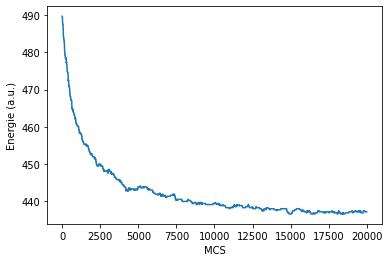

In [5]:
# Schritt 5 - Plott des Energie- und Konfigurationsverlaufs
plt.plot(energie_course)
plt.xlabel("MCS")
plt.ylabel("Energie (a.u.)")
plt.show()

In [18]:
print(lattice)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 

#### b)

Welche thermodynamische Zustandsgröße ist in diesem Zustand minimiert? Wie würde das Gitter aussehen, wenn $ T \rightarrow 0$ gehen würde?

Antwort: Die freie Energie F wird minimiert. Bei $T \rightarrow 0$ ergibt sich eine perfekte Separation der beiden Phasen.

#### c)

Welchen Vorteil bietet der Metropolis Monte Carlo Algorithmus im Vergleich zum zufälligen Würfeln von Gittern?

Antwort: Beim Metropolis Monte Carlo Algorithmus werden die Gitter mit ihrer Boltzmann-Wahrscheinlichkeit gewürfelt, sodass nur über den relevanten Energiebereich gemittelt wird.

Die folgende Darstellung ist mit Spielzeugparametern: ($\varepsilon_\mathrm{AA} = \varepsilon_\mathrm{BB} = 0$,  $\varepsilon_\mathrm{AB} = 1\ \mathrm{eV}$, $T = 10000\ \mathrm{K}$, Anzahl an Teilchen = 20)

In [7]:
# Definition der Energievariablen
e_aa = 0
e_bb = 0
e_ab = 1
energy_table = [e_aa, e_ab, e_bb]

# Definition der restlichen Variablen
T = 10000
size = 20

# Definition des Anfangsgitters
lattice = []
for _ in range(size):
    lattice.append(random.choice([0, 1]))

energie_course_small = []
mcs = 0
energy = calc_lattice_energy(lattice)
while mcs < 200000:
    
    # zwei Positionen zufällig ermitteln
    pos1 = random.randint(0, size-1)
    pos2 = random.randint(0, size-1)
      
    # Vertauschen der Einträge auf beiden Positionen
    lattice[pos1], lattice[pos2] = lattice[pos2], lattice[pos1] 
    
    # Berechnung der neuen Gitterenergie
    energy_new = calc_lattice_energy(lattice)
    
    # Überprüfen, ob Vertauschung angenommen wird mit Boltzmann-Term und weiteres Vorgehen
    if np.exp(-(energy_new-energy)/(8.62e-5*T)) > random.random():
        mcs += 1
        energy = energy_new
        energie_course_small.append(energy)
    else:
        lattice[pos1], lattice[pos2] = lattice[pos2], lattice[pos1]

In [8]:
# zufälliges würfeln von Gittern
random_energies = []
for _ in range(200000):
    lattice = [random.choice([0, 1]) for _ in range(20)]
    random_energies.append(calc_lattice_energy(lattice))

In [9]:
min_energy = 2
max_energy = 20
energy_space = np.array(range(2,22,2))
boltzmann = np.exp(-(energy_space-2)/(8.62e-5*T))

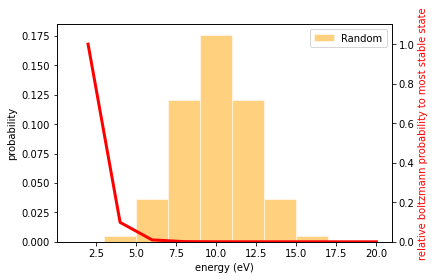

In [12]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

metropolis_energies = energie_course_small[200:]
ax1.hist(random_energies, label="Random", bins=range(2,22,2), 
         alpha=0.5, align="left", edgecolor='white', density=True, color="orange")

ax2.plot(energy_space, boltzmann, color="red", linewidth=3)
ax2.set_ylim(0, 1.1)

ax1.legend()
ax1.set_xlabel(r"energy (eV)")
ax1.set_ylabel("probability")
ax2.set_ylabel("relative boltzmann probability to most stable state", color="red")
plt.show()

Das obige Bild zeigt die Energieverteilung für zufällig gewürfelte Gitter. Die rote Linie zeigt die Boltzmannwahrscheinlichkeit für jede Energie im Vergleich zum günstigsten Zustand. Die meisten zufällig gewürfelten Gitter haben sind energetisch sehr unwahrscheinlich und tragen kaum zum Erwartungswert der Energie bei.

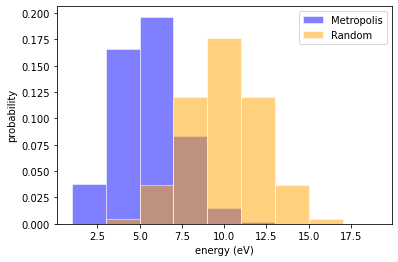

In [11]:
fig, ax1 = plt.subplots()

metropolis_energies = energie_course_small[200:]
ax1.hist(metropolis_energies, label="Metropolis", bins=range(2,22,2), 
         alpha=0.5, align="left", edgecolor='white', density=True, color="blue")
ax1.hist(random_energies, label="Random", bins=range(2,22,2), 
         alpha=0.5, align="left", edgecolor='white', density=True, color="orange")

ax1.legend()
ax1.set_xlabel(r"energy (eV)")
ax1.set_ylabel("probability")
plt.show()

Metropolis Monte Carlo Algorithmus bildet die energetische Wahrscheinlichkeitsverteilung ab und ist daher besser geeignet um den Erwartungswert der Energie zu berechnen, als das zufällige Würfeln.